In [2]:
import gc
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def get_files_names(path):
    files_name = glob.glob(path)
    return files_name


path = "./truth/*/*.npz"
files_name = get_files_names(path)
print(files_name)


def get_data(path):
    try:
        with np.load(path, allow_pickle=True) as f:
            data_dict = {name: f[name] for name in f.files}
            return pd.DataFrame(data_dict)
    except FileNotFoundError:
        print("File not found!")
        return pd.DataFrame()


files = []
files_name.sort()
for f in files_name:
    files.append(get_data(f))

# need to check the order of data name.
print(files_name)

# need to follow the order of data name.
(
    CGLMP,
    Higgs,
    LeadLep,
    LepM,
    LepP,
    NuM,
    NuP,
    MET,
    Wm,
    Wp,
    diLep,
    SubLep,
    Xi,
) = files

del files_name, files
gc.collect()

['./truth/archive/LeptonP.npz', './truth/archive/subLeadLepton.npz', './truth/archive/CGLMP.npz', './truth/archive/xi_xyz.npz', './truth/archive/diLepton.npz', './truth/archive/LeadLepton.npz', './truth/archive/MET.npz', './truth/archive/Higgs.npz', './truth/archive/WmBoson.npz', './truth/archive/LpNu.npz', './truth/archive/LmNu.npz', './truth/archive/LeptonM.npz', './truth/archive/WpBoson.npz']
['./truth/archive/CGLMP.npz', './truth/archive/Higgs.npz', './truth/archive/LeadLepton.npz', './truth/archive/LeptonM.npz', './truth/archive/LeptonP.npz', './truth/archive/LmNu.npz', './truth/archive/LpNu.npz', './truth/archive/MET.npz', './truth/archive/WmBoson.npz', './truth/archive/WpBoson.npz', './truth/archive/diLepton.npz', './truth/archive/subLeadLepton.npz', './truth/archive/xi_xyz.npz']


528

In [6]:
# Some constants
GEV = 1e3
# RMV_EVT = [638488, 835579, 2168342] # escape some mathmetical errors.
RMV_EVT = []  # escape some mathmetical errors.

In [7]:
# Kinemetic info of leptons.
lep_kin = (
    pd.DataFrame(
        {
            "lep_p_E": LepP["E"],
            "lep_p_px": LepP["px"],
            "lep_p_py": LepP["py"],
            "lep_p_pz": LepP["pz"],
            "lep_m_E": LepM["E"],
            "lep_m_px": LepM["px"],
            "lep_m_py": LepM["py"],
            "lep_m_pz": LepM["pz"],
        }
    )
    / GEV
)

# check format l+ -> (E, px, py, pz); then, append l- with the same format of l+.
print(lep_kin.shape)
lep_kin.drop(RMV_EVT, inplace=True)
print(lep_kin.shape)
lep_kin.head(5)

(2928862, 8)
(2928862, 8)


,lep_p_E,lep_p_px,lep_p_py,lep_p_pz,lep_m_E,lep_m_px,lep_m_py,lep_m_pz
0,19.465703,-5.065763,16.360542,-9.250574,12.031222,11.081455,2.673936,-3.847299
1,131.817141,8.901175,2.966260,131.482766,66.401992,-13.096559,14.755815,63.403242
2,94.193734,-3.040100,49.431305,80.123430,26.267500,7.589698,1.677931,25.090863
3,165.226891,4.702402,-19.638676,163.988219,36.290188,0.038865,20.284725,30.091441
4,6.403636,5.808921,-2.135702,-1.643704,32.603137,11.729594,30.418752,0.263776


In [8]:
# # Kinemetic info of neutirnos.
# nu_kin = pd.DataFrame({
#     'nu_p_E' : NuP['E'],
#     'nu_p_px': NuP['px'],
#     'nu_p_py': NuP['py'],
#     'nu_p_pz': NuP['pz'],
#     'nu_m_E' : NuM['E'],
#     'nu_m_px': NuM['px'],
#     'nu_m_py': NuM['py'],
#     'nu_m_pz': NuM['pz'],
# })/GEV

# # check format nu+ -> (E, px, py, pz); then, append nu- with the same format of l+.
# print(nu_kin.shape)
# nu_kin.drop(RMV_EVT, inplace=True)
# print(nu_kin.shape)
# nu_kin.head(5)

In [13]:
# Kinemetic info of neutirnos.
nu_kin = (
    pd.DataFrame(
        {
            "di_nu_m": 34141 * np.ones(len(MET)),
            "di_nu_px": MET["px"],
            "di_nu_py": MET["py"],
            "di_nu_pz": np.zeros(len(MET)),
        }
    )
    / GEV
)

# check format nu+ -> (E, px, py, pz); then, append nu- with the same format of l+.
print(nu_kin.shape)
nu_kin.drop(RMV_EVT, inplace=True)
print(nu_kin.shape)
nu_kin.head(5)

(2928862, 4)
(2928862, 4)


,di_nu_m,di_nu_px,di_nu_py,di_nu_pz
0,34.141,21.531590,58.661363,0.0
1,34.141,142.831582,-36.235636,0.0
2,34.141,-4.344014,-53.593527,0.0
3,34.141,-19.836591,-17.248187,0.0
4,34.141,-21.864079,-26.724745,0.0


In [14]:
# CGLMP.
CGLMP = pd.DataFrame(
    {
        "Bxy": CGLMP["Bxy"],
        "Byz": CGLMP["Byz"],
        "Bzx": CGLMP["Bzx"],
    }
)

# check
print(CGLMP.shape)
CGLMP.drop(RMV_EVT, inplace=True)
print(CGLMP.shape)
CGLMP.head(5)

(2928862, 3)
(2928862, 3)


,Bxy,Byz,Bzx
0,5.379610,-0.375224,8.00803
1,-4.331580,15.150000,-5.99553
2,4.612100,21.715400,19.46050
3,-12.159800,-1.537670,-5.16628
4,-0.905081,24.782200,6.81644


In [15]:
import tensorflow as tf

print(tf.config.list_physical_devices())
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
from lbn import LBN, LBNLayer

2023-09-18 06:07:57.739938: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
2.13.0


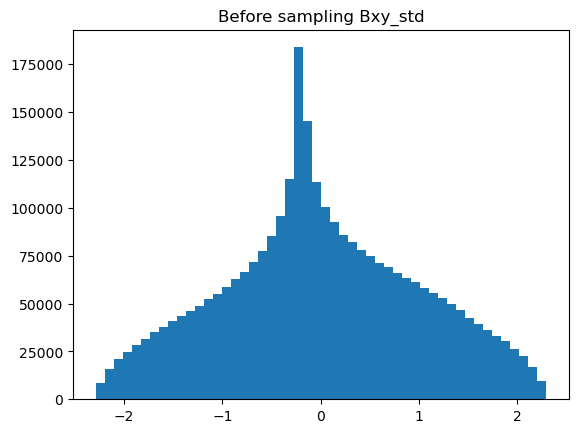

2.299248862698251 -2.292063273788311
std: 1.0000000000000007
2928862


In [17]:
from sklearn.preprocessing import StandardScaler

SCALAR = StandardScaler()
Bxy_std = SCALAR.fit_transform(
    [[x] for x in CGLMP["Bxy"]]
).flatten()  # zero mean and unit variance
plt.hist(Bxy_std, bins=50)
plt.title("Before sampling Bxy_std")
plt.show()
plt.close()
print(Bxy_std.max(), Bxy_std.min())
print("std:", Bxy_std.std())
print(len(Bxy_std))

plt.hist(CGLMP["Bxy"], bins=50)
plt.title("Original Bxy")
print(CGLMP["Bxy"].max(), CGLMP["Bxy"].min())
print("std:", CGLMP["Bxy"].std())
print("mean:", CGLMP["Bxy"].mean())
print(len(CGLMP["Bxy"]))
plt.show()
plt.close()

In [18]:
# Undersampling to an uniform distribution

n = int(1e2)
step = (Bxy_std.max() - Bxy_std.min()) / n
intervals = [Bxy_std.min() + i * step for i in range(n)]

sampling = int(1e3)
indices_arr = np.empty((n - 1, sampling), dtype=int)
for i in range(n - 1):
    try:
        indices_arr[i] = np.random.choice(
            np.where((intervals[i] < Bxy_std) * (Bxy_std <= intervals[i + 1]))[0],
            size=sampling,
            replace=False,
        )
    except ValueError:
        print("Cannot take a larger sample than population when 'replace=False")
        break

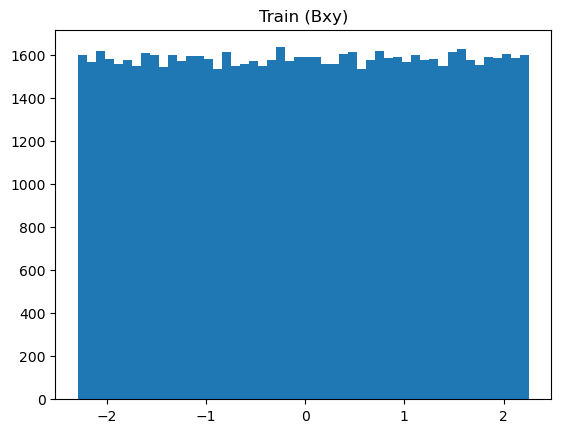

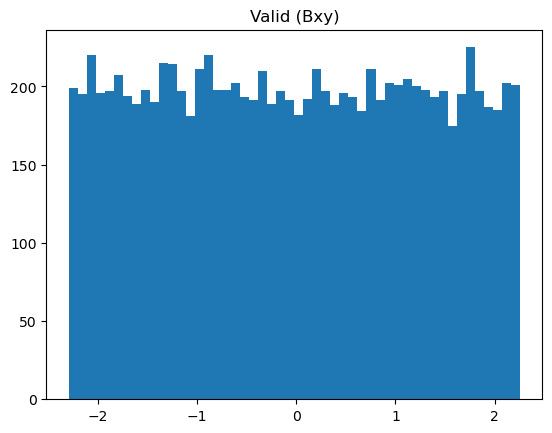

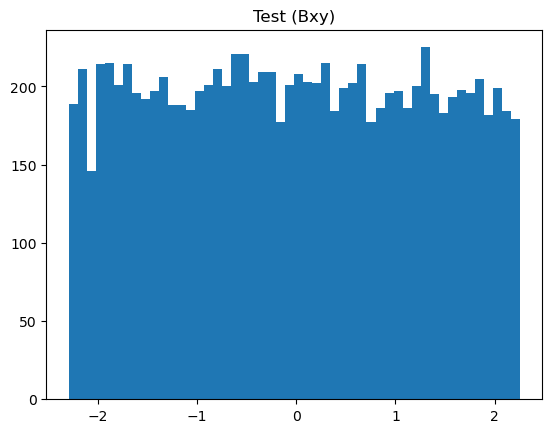

Training data shape: (79200, 3, 4)
Testing data shape: (9900, 3, 4)
Validation data shape: (9900, 3, 4)
None


30353

In [40]:
from sklearn.model_selection import train_test_split

lepton_features = [
    "lep_p_E",
    "lep_p_px",
    "lep_p_py",
    "lep_p_pz",
    "lep_m_E",
    "lep_m_px",
    "lep_m_py",
    "lep_m_pz",
]
neutrino_features = ["di_nu_m", "di_nu_px", "di_nu_py", "di_nu_pz"]


def reshape_features_lep(inputs, features):
    outputs = np.stack([inputs[features[0:4]], inputs[features[4:8]]], axis=1)
    return outputs


def reshape_features_dinu(inputs, features):
    outputs = np.expand_dims(inputs[features[0::]].to_numpy(), axis=1)
    return outputs


train_indices, temp_indices = train_test_split(
    indices_arr.flatten(), train_size=0.8, test_size=0.2, random_state=42
)
valid_indices, test_indices = train_test_split(
    temp_indices, train_size=0.5, test_size=0.5, random_state=42
)

lep_train = reshape_features_lep(lep_kin.iloc[train_indices], lepton_features)
lep_valid = reshape_features_lep(lep_kin.iloc[valid_indices], lepton_features)
lep_test = reshape_features_lep(lep_kin.iloc[test_indices], lepton_features)

nu_train = reshape_features_dinu(nu_kin.iloc[train_indices], neutrino_features)
nu_valid = reshape_features_dinu(nu_kin.iloc[valid_indices], neutrino_features)
nu_test = reshape_features_dinu(nu_kin.iloc[test_indices], neutrino_features)

Bxy_train = Bxy_std[train_indices]
Bxy_valid = Bxy_std[valid_indices]
Bxy_test = Bxy_std[test_indices]
plt.hist(Bxy_train, bins=50)
plt.title("Train (Bxy)")
plt.show()
plt.hist(Bxy_valid, bins=50)
plt.title("Valid (Bxy)")
plt.show()
plt.hist(Bxy_test, bins=50)
plt.title("Test (Bxy)")
plt.show()


def stack_parts(input1, input2):
    outputs = np.concatenate([input1, input2], axis=1)
    return outputs


# print(f'Training data shape: {lep_train.shape}\nTesting data shape: {lep_test.shape}\nValidation data shape: {lep_valid.shape}')
train = stack_parts(lep_train, nu_train)
valid = stack_parts(lep_valid, nu_valid)
test = stack_parts(lep_test, nu_test)

print(
    print(
        f"Training data shape: {train.shape}\nTesting data shape: {test.shape}\nValidation data shape: {valid.shape}"
    )
)

del (
    train_indices,
    temp_indices,
    valid_indices,
    test_indices,
    lep_train,
    lep_valid,
    lep_test,
    nu_train,
    nu_valid,
    nu_test,
)
gc.collect()

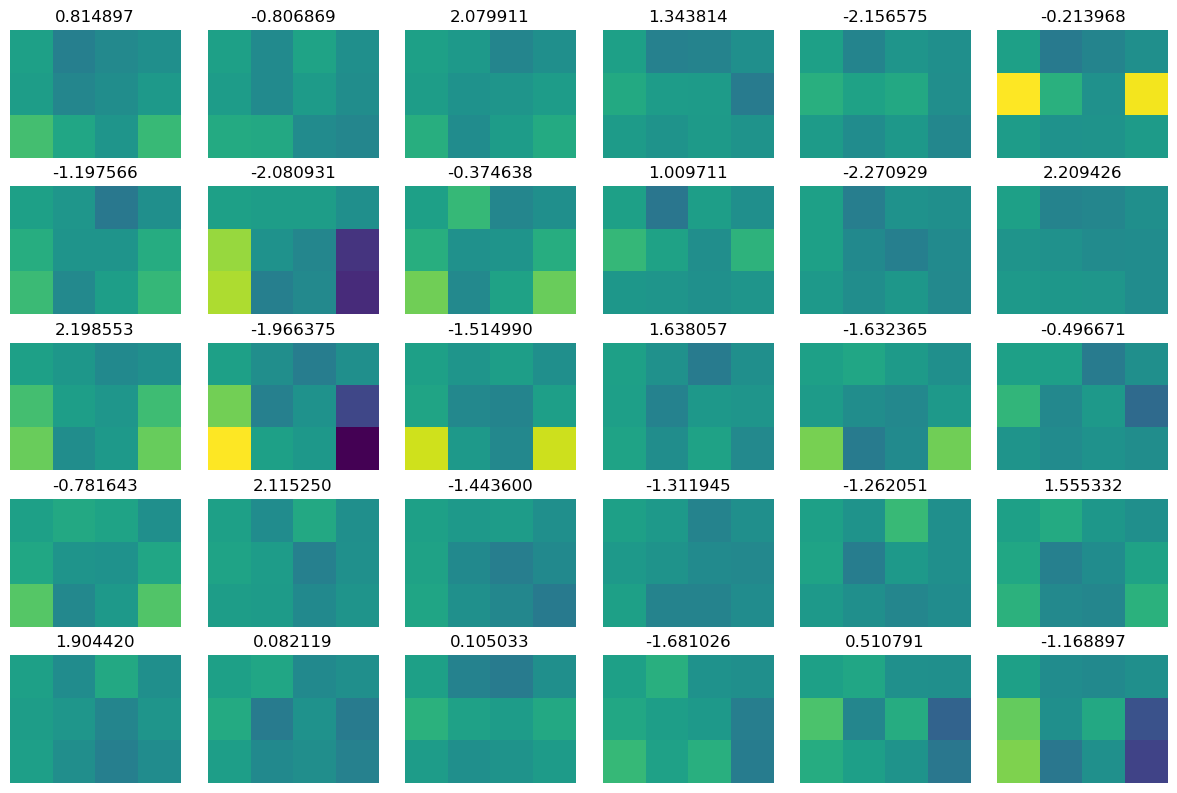

In [42]:
# Create random data for 50 figures (4x4 matrices)
num_figures = 30

# Calculate the grid dimensions (rows x columns)
num_rows = 5
num_cols = 6

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the figures and plot them on subplots
for i, ax in enumerate(axes):
    ax.imshow(
        train[i],
        cmap="viridis",
        origin="lower",
        vmin=train[0 : num_figures + 1].min(),
        vmax=train[0 : num_figures + 1].max(),
    )
    ax.set_title(f"{Bxy_train[i]:2f}")
    ax.axis("off")  # Turn off axis labels
plt.tight_layout()
plt.show()

### Model define


In [83]:
def build_model(lbn=True):
    # define model
    model = keras.models.Sequential()

    # use LBN layer or not
    input_shape = (3, 4) # 3 particles with 4 vector
    if lbn == True:
        N_combinations = 8 # number of composite particles/rest frames
        model.add(
            LBNLayer(
                input_shape,
                N_combinations,
                boost_mode=LBN.PAIRS,
                features=["E", "pt", "eta", "phi", "m", "pair_cos"],
            )
        )
        print("Use LBN layer...")
    else:
        model.add(layers.Flatten(input_shape=input_shape))
        print("Not using LBN layer...")

    # Simple DNN hidden layers
    model.add(layers.Dense(units=32, activation="elu"))
    model.add(layers.Dense(units=32, activation="elu"))
    model.add(layers.Dense(units=8, activation="elu"))
    model.add(layers.Dense(units=8, activation="elu"))

    # Last dense layer
    model.add(layers.Dense(units=1, activation="linear"))

    # Compile model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss="mse")
    model.summary()

    return model


model = build_model(lbn=True)

Use LBN layer...
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LBN (LBNLayer)              (None, 68)                48        
                                                                 
 dense_46 (Dense)            (None, 32)                2208      
                                                                 
 dense_47 (Dense)            (None, 32)                1056      
                                                                 
 dense_48 (Dense)            (None, 8)                 264       
                                                                 
 dense_49 (Dense)            (None, 8)                 72        
                                                                 
 dense_50 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3657 (14.29 KB)
Traina

In [84]:
# Fit the model
stop_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
history = model.fit(
    x=train,
    y=Bxy_train,
    validation_data=(valid, Bxy_valid),
    epochs=100,
    batch_size=256,
    callbacks=stop_early,
    verbose=2,
)
print("\nFinish!")

Epoch 1/100
310/310 - 5s - loss: 31.9125 - val_loss: 1.6372 - 5s/epoch - 16ms/step
Epoch 2/100
310/310 - 2s - loss: 1.5290 - val_loss: 1.6085 - 2s/epoch - 7ms/step
Epoch 3/100
310/310 - 2s - loss: 1.4639 - val_loss: 1.5205 - 2s/epoch - 7ms/step
Epoch 4/100
310/310 - 2s - loss: 1.4559 - val_loss: 1.4839 - 2s/epoch - 7ms/step
Epoch 5/100
310/310 - 2s - loss: 1.4235 - val_loss: 1.4609 - 2s/epoch - 7ms/step
Epoch 6/100
310/310 - 2s - loss: 1.4139 - val_loss: 1.3975 - 2s/epoch - 7ms/step
Epoch 7/100
310/310 - 2s - loss: 1.4108 - val_loss: 1.3962 - 2s/epoch - 7ms/step
Epoch 8/100
310/310 - 2s - loss: 1.4009 - val_loss: 1.4065 - 2s/epoch - 7ms/step
Epoch 9/100
310/310 - 2s - loss: 1.3994 - val_loss: 1.3934 - 2s/epoch - 7ms/step
Epoch 10/100
310/310 - 2s - loss: 1.3948 - val_loss: 1.3910 - 2s/epoch - 7ms/step
Epoch 11/100
310/310 - 2s - loss: 1.3913 - val_loss: 1.3764 - 2s/epoch - 7ms/step
Epoch 12/100
310/310 - 2s - loss: 1.3920 - val_loss: 1.3746 - 2s/epoch - 7ms/step
Epoch 13/100
310/310 - 

In [85]:
Bxy_pred = model.predict(test)

310/310 [==============================] - 1s 2ms/step


RMSE: 1.2532860928406035
MAX of pred: 1.6605041027069092; MIN of pred: -1.4287865161895752
MAX of test: 2.2530456181818734; MIN of test: -2.290569869480355


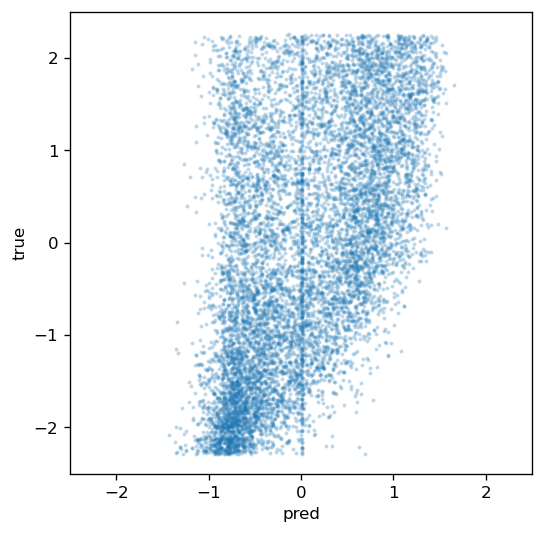

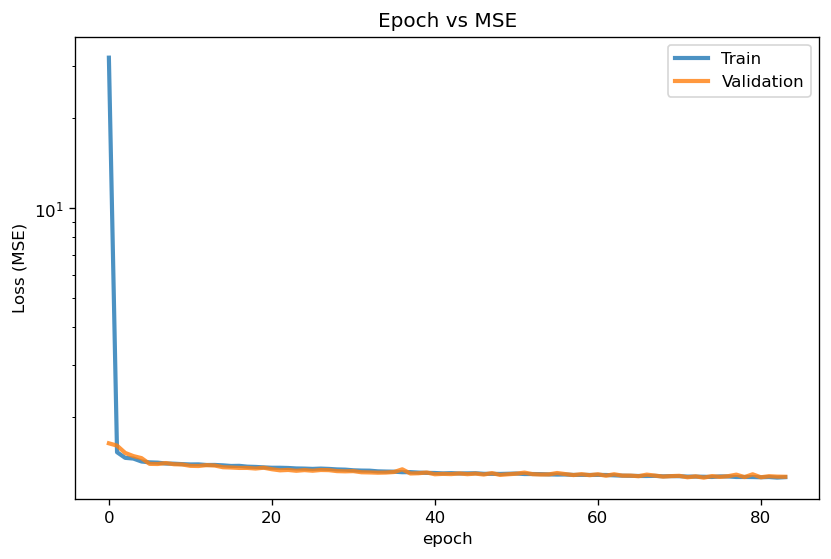

In [86]:
from sklearn.metrics import mean_squared_error

print(
    f"""RMSE: {mean_squared_error(Bxy_test, Bxy_pred)}
MAX of pred: {Bxy_pred.max()}; MIN of pred: {Bxy_pred.min()}
MAX of test: {Bxy_test.max()}; MIN of test: {Bxy_test.min()}"""
)

# Plot the results
fig = plt.figure(figsize=(5, 5), dpi=120)
ax = fig.add_subplot()
plt.plot(Bxy_pred, Bxy_test, ".", color="tab:blue", alpha=0.2, markersize=3)
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])
plt.xlabel("pred")
plt.ylabel("true")
ax.set_aspect("equal", adjustable="box")
plt.show()
plt.close()

fig = plt.figure(figsize=(8, 5), dpi=120)
plt.plot(history.history["loss"], lw=2.5, label="Train", alpha=0.8)
plt.plot(history.history["val_loss"], lw=2.5, label="Validation", alpha=0.8)
plt.semilogy()
plt.title("Epoch vs MSE")
plt.xlabel("epoch")
plt.ylabel("Loss (MSE)")
plt.legend(loc="best")
plt.show()
plt.close()